In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [51]:

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train=[]
        self.y_train=[]

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = np.array(X_train), np.array(y_train)

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.array([self._euclidean_distance(x, x_train) for x_train in self.X_train])
            k_indices = distances.argsort()[:self.k]

            k_neighbor_labels = self.y_train[k_indices]
            predicted_label = np.bincount(k_neighbor_labels).argmax()

            predictions.append(predicted_label)
        return np.array(predictions)


In [52]:

def generate_synthetic_data(m=3, num_points=100, std=1.0):
    np.random.seed(40)
    X, y = [], []
    for i in range(m):
        mean = [3 * np.cos(2 * np.pi * i / m), 3 * np.sin(2 * np.pi * i / m)]
        X.append(np.random.multivariate_normal(mean, [[std, 0], [0, std]], num_points))
        y += [i] * num_points
    return np.vstack(X), np.array(y)


In [53]:
def plot_decision_boundaries(classifier, X, y, title='kNN Decision Boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', edgecolor='k', s=40)
    plt.title(title)
    plt.show()




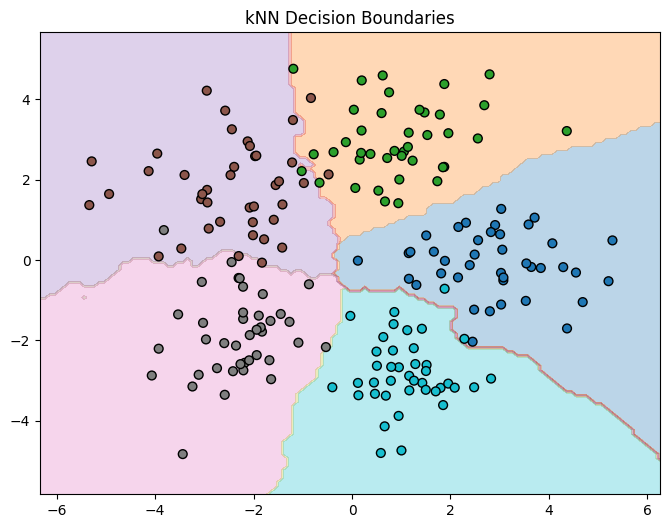

In [54]:
m, num_points, std, k = 5, 50, 1.0, 5
X, y = generate_synthetic_data(m, num_points, std)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

knn = KNN(k)
knn.fit(X_train, y_train)
plot_decision_boundaries(knn, X_train, y_train)